In [1]:
# Import dependencies
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime as dt
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pymongo
style.use('ggplot')

In [2]:
# Set start and end data for query
start = dt.datetime(2000,1,1)
end = dt.datetime(2018,12,31)

# Pull data from Yahoo and create df for SPY
df = web.DataReader('SPY', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.4375,8164300.0,101.872139
2000-01-04,144.062500,139.640594,143.531204,139.7500,8089800.0,97.888344
2000-01-05,141.531204,137.250000,139.937500,140.0000,12177900.0,98.063423
2000-01-06,141.500000,137.750000,139.625000,137.7500,6227200.0,96.487427
2000-01-07,145.750000,140.062500,140.312500,145.7500,8066500.0,102.091049


In [3]:
# Save df to csv
df.to_csv('spy.csv')

In [2]:
# Read data from csv
spy_df = pd.read_csv('spy.csv', parse_dates=True, index_col=0)
spy_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.4375,8164300.0,101.872139
2000-01-04,144.062500,139.640594,143.531204,139.7500,8089800.0,97.888344
2000-01-05,141.531204,137.250000,139.937500,140.0000,12177900.0,98.063423
2000-01-06,141.500000,137.750000,139.625000,137.7500,6227200.0,96.487427
2000-01-07,145.750000,140.062500,140.312500,145.7500,8066500.0,102.091049


In [3]:
# Create a column that shows the 100 Day Moving Average
spy_df['100MA'] = spy_df['Adj Close'].rolling(window=100, min_periods=0).mean()

# Drop unneccessary columns
spy_df2 = spy_df.drop(["High","Low","Open","Close"], axis=1)

In [4]:
# Rename columns to prep for merge
spy_df2.rename(columns={"Volume":"SPY Volume", "Adj Close":"SPY AdjClose", "100MA":"SPY 100MA"}, inplace=True)
spy_df2.head()

,SPY Volume,SPY AdjClose,SPY 100MA
Date,,,
2000-01-03,8164300.0,101.872139,101.872139
2000-01-04,8089800.0,97.888344,99.880241
2000-01-05,12177900.0,98.063423,99.274635
2000-01-06,6227200.0,96.487427,98.577833
2000-01-07,8066500.0,102.091049,99.280476


In [ ]:
# Pull data from Yahoo and create df for VIX 
df = web.DataReader('VIX', 'yahoo', start, end)
df.head()

In [ ]:
# Save df to csv
df.to_csv('vix.csv')

In [5]:
# Read data from csv
vix_df = pd.read_csv('vix.csv', parse_dates=True, index_col=0)
vix_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,26.150000,23.980000,24.360001,24.209999,0,24.209999
2000-01-04,27.180000,24.799999,24.940001,27.010000,0,27.010000
2000-01-05,29.000000,25.850000,27.980000,26.410000,0,26.410000
2000-01-06,26.709999,24.700001,26.680000,25.730000,0,25.730000
2000-01-07,25.170000,21.719999,25.139999,21.719999,0,21.719999


In [6]:
# Create a column that shows the 100 Day Moving Average
vix_df['100MA'] = vix_df['Adj Close'].rolling(window=100, min_periods=0).mean()

# Drop unneccessary columns
vix_df2 = vix_df.drop(["High","Low","Open","Close"], axis=1)

In [7]:
# Rename columns to prep for merge
vix_df2.rename(columns={"Volume":"VIX Volume", "Adj Close":"VIX AdjClose", "100MA":"VIX 100MA"}, inplace=True)
vix_df2.head()

,VIX Volume,VIX AdjClose,VIX 100MA
Date,,,
2000-01-03,0,24.209999,24.209999
2000-01-04,0,27.010000,25.610000
2000-01-05,0,26.410000,25.876666
2000-01-06,0,25.730000,25.840000
2000-01-07,0,21.719999,25.016000


In [8]:
# Join SPY data and VIX data on date
market_df= spy_df2.join(vix_df2, how="outer", on="Date")
market_df.head()

,SPY Volume,SPY AdjClose,SPY 100MA,VIX Volume,VIX AdjClose,VIX 100MA
Date,,,,,,
2000-01-03,8164300.0,101.872139,101.872139,0,24.209999,24.209999
2000-01-04,8089800.0,97.888344,99.880241,0,27.010000,25.610000
2000-01-05,12177900.0,98.063423,99.274635,0,26.410000,25.876666
2000-01-06,6227200.0,96.487427,98.577833,0,25.730000,25.840000
2000-01-07,8066500.0,102.091049,99.280476,0,21.719999,25.016000


In [9]:
# Read Unemployment data from csv
unemployment_df = pd.read_csv('Unemployment rate.csv', parse_dates=True, index_col=0)

# Multiply by 10 to make line comparable on chart
unemployment_df.Rate *=10
unemployment_df.head()

,Rate
Date,
2000-01-01,40.0
2000-02-01,41.0
2000-03-01,40.0
2000-04-01,38.0
2000-05-01,40.0


In [ ]:
# Create connection to MongoDB
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Declare the database
db = client.marketData_db

# Declare the collection
collection = db.market_df

# Convert market_df to dictionary
market_data = market_df.to_dict(orient='records')

# Insert market dictionary into Mongo
collection.insert_many(market_data)

In [ ]:
# Declare the database
db = client.marketData_db

# Declare the collection
collection = db.unemployment_df

# Convert unemployment_df to dictionary
unemployment_data = unemployment_df.to_dict(orient='records')

# Insert unemployment dictionary into Mongo
collection.insert_many(unemployment_data)

<IPython.core.display.Javascript object>


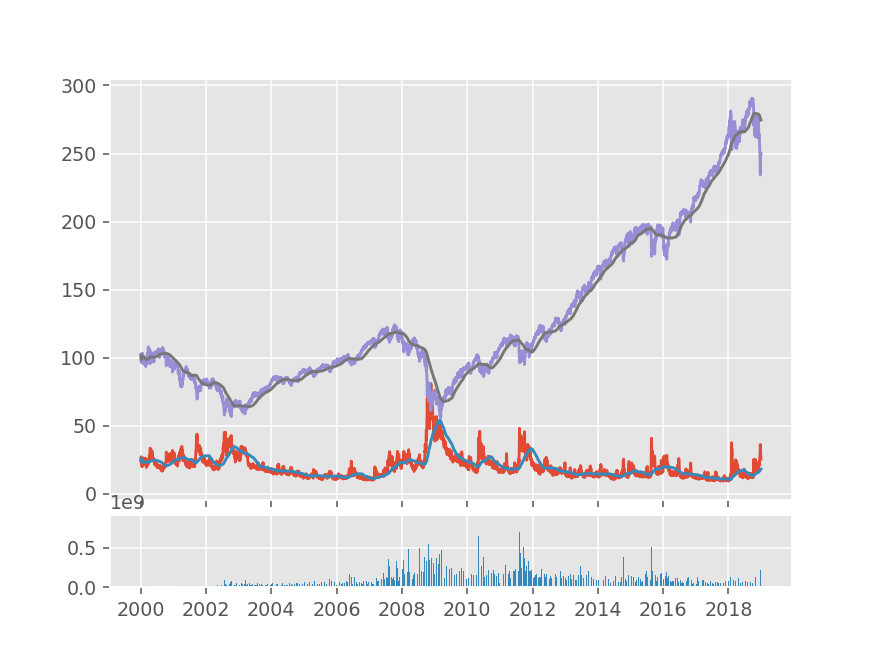

In [10]:
# Set up graph area
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# Plot Adj Close and 100 Average lines on first plot area 
ax1.plot(market_df.index, market_df['VIX AdjClose'])
ax1.plot(market_df.index,market_df['VIX 100MA'])
ax1.plot(market_df.index, market_df['SPY AdjClose'])
ax1.plot(market_df.index,market_df['SPY 100MA'])

# Plot the SPY volume bars in second plot area
ax2.bar(market_df.index, market_df['SPY Volume'])

plt.show()

In [ ]:
# Save figure
plt.savefig('SPYvsVIX.png')

<IPython.core.display.Javascript object>


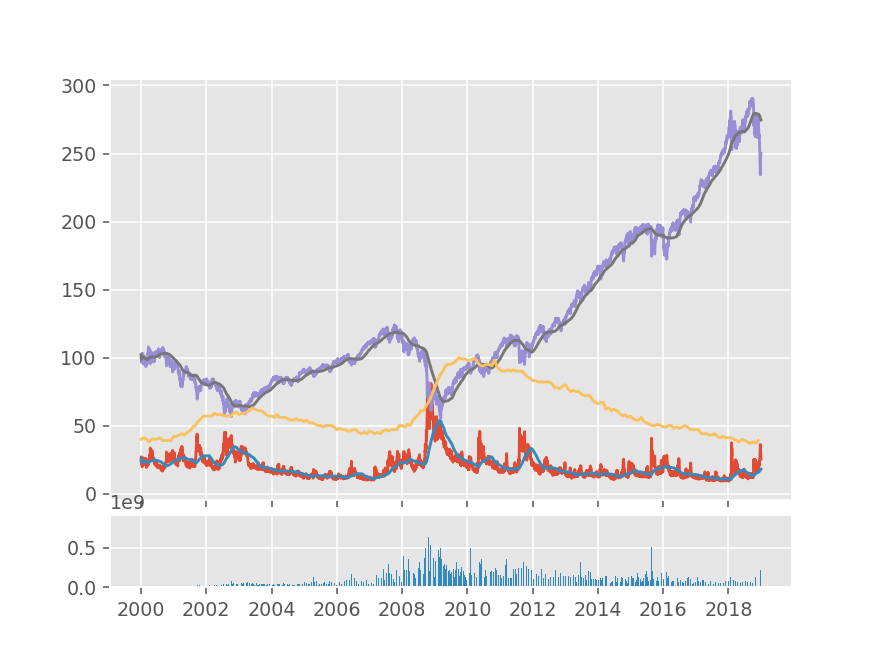

In [13]:
# Set up plot areas
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# Plot Adj Close and 100 Day Moving Average on top plot area
ax1.plot(market_df.index, market_df['VIX AdjClose'])
ax1.plot(market_df.index,market_df['VIX 100MA'])
ax1.plot(market_df.index, market_df['SPY AdjClose'])
ax1.plot(market_df.index,market_df['SPY 100MA'])

# Plot SPy Volume bars in second plot area
ax2.bar(market_df.index, market_df['SPY Volume'])

# Plot the Unemployment Rate line in top plot area
ax1.plot(unemployment_df.index, unemployment_df['Rate'])

plt.show()

In [36]:
# Save image
plt.savefig("Unemployment vs Market")